Лабораторная работа №3: Меры связи случайных величин. Интервальные оценки параметров
1.	Найти на сайте РосСтат  https://rosstat.gov.ru/statistic  (или в других источниках) предположительно зависимые данные (например: «доля людей в возрасте 70+» и «приверженность жителей тех к ЗОЖ» по регионам), посчитать коэффициент корреляции, оценить меру связи.
Построить гистограммы рассеяния, линию аппроксимации  и посчитать величину достоверности аппроксимации R^2.
2.	Найти датасет с объемом ~100 наблюдений (и более), сделать выборку =~ 1/3 наблюдений 1) случайным образом, 
2) сделать стратифицированную выборку (разбив выборку на группы по смысловому содержанию, например, для регионов стратами могут быть федеральные округа). 
3.	Посчитать 
1) среднее значение по выборкам из п.2 (2.1)случайной и 2.2)стратифицированной), 
2) доверительный интервал для среднего (на уровне доверия 90%, 95%, 99%).
 Сравнить среднее генеральной выборки п.2  с полученными в выборках 2.1) и 2.2)  и с границами доверительных интервалов из п.3.2).


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy import stats
from sklearn.metrics import r2_score

df = pd.read_csv('train.csv')

# Часть 1

In [2]:
# корреляция между площаью жилья и его стоимостью
correlation = df[['GrLivArea', 'SalePrice']].corr().iloc[0, 1]
print("Коэффициент корреляции:", correlation)

Коэффициент корреляции: 0.7086244776126515


In [3]:
# Коэффициент коррелиции свидетельствует о сильной положительной связи.

Величина достоверности аппроксимации R^2: 0.5021486502718042


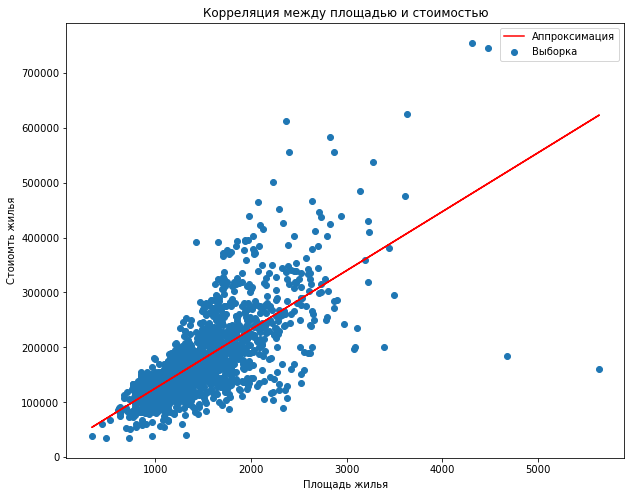

In [4]:
x = df['GrLivArea'].values.reshape(-1, 1)
y = df['SalePrice']

# Линейная регрессия
model = LinearRegression().fit(x, y)
y_pred = model.predict(x)

# R^2
r2 = r2_score(y, y_pred)
print("Величина достоверности аппроксимации R^2:", r2)

# Построение графика
plt.figure(figsize=(10, 8))
plt.scatter(x, y, label='Выборка')
plt.plot(x, y_pred, color='red', label='Аппроксимация')
plt.xlabel("Площадь жилья")
plt.ylabel("Стоиомть жилья")
plt.title("Корреляция между площадью и стоимостью")
plt.legend()
plt.show()

# Часть 2

In [5]:
sample_random = df.sample(frac=0.33, random_state=42)
# Стратифицированную выборку соберем относительно года постройки
sample_stratified = df.groupby('YearBuilt').apply(lambda x: x.sample(frac=0.33, random_state=42)).reset_index(drop=True)

In [6]:
len(sample_stratified), len(sample_random)

(484, 482)

In [7]:
# 1. Среднее значение по выборкам
random_mean = sample_random['SalePrice'].mean()
stratified_mean = sample_stratified['SalePrice'].mean()

print(f"Среднее значение случайной выборки: {random_mean:.2f}")
print(f"Среднее значение стратифицированной выборки: {stratified_mean:.2f}")
print('\n')

# 2. Доверительные интервалы для среднего
std_err_rand = sample_random['SalePrice'].std() / np.sqrt(len(sample_random))
std_err_strat = sample_random['SalePrice'].std() / np.sqrt(len(sample_random))

for level in (0.90, 0.95, 0.99):
    interval = stats.t.interval(level, len(sample_random ) - 1, loc=random_mean, scale=std_err_rand)
    print(f"Random: Доверительный интервал для уровня {level*100}%: ({interval[0]:.2f}, {interval[1]:.2f})")

print('\n')
for level in (0.90, 0.95, 0.99):
    interval = stats.t.interval(level, len(sample_stratified ) - 1, loc=stratified_mean, scale=std_err_strat)
    print(f"Stratified: Доверительный интервал для уровня {level*100}%: ({interval[0]:.2f}, {interval[1]:.2f})")


Среднее значение случайной выборки: 180666.02
Среднее значение стратифицированной выборки: 179219.68


Random: Доверительный интервал для уровня 90.0%: (174227.58, 187104.47)
Random: Доверительный интервал для уровня 95.0%: (172989.60, 188342.45)
Random: Доверительный интервал для уровня 99.0%: (170562.80, 190769.25)


Stratified: Доверительный интервал для уровня 90.0%: (172781.29, 185658.08)
Stratified: Доверительный интервал для уровня 95.0%: (171543.34, 186896.02)
Stratified: Доверительный интервал для уровня 99.0%: (169116.62, 189322.74)


In [8]:
df_mean = df['SalePrice'].mean()
print(f"\nСреднее значение генеральной выборки: {df_mean:.2f}")


Среднее значение генеральной выборки: 180921.20


In [9]:
# Среднее значение генеральной выборки входит в 90% доверительный интервал для обоих выборок
# Среднее значение генеральной выборки получилось ближе к среднему значению рандомной выборки